In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.utils import shuffle

In [2]:
N=400
angles = np.random.uniform(0,2*np.pi,size=N//2)
r1 = np.random.uniform(0,1.5,size=N//2)
r2 = np.random.uniform(2,3.5,size=N//2)
X_1 = np.stack([
    r1 * np.cos(angles),
    r1 * np.sin(angles)
],axis=-1)
X_2 = np.stack([
    r2 * np.cos(angles),
    r2 * np.sin(angles)
],axis=-1)

In [3]:
X = np.concatenate([X_1,X_2],axis=0)
Y = np.concatenate([
    np.zeros(shape=(X_1.shape[0]),dtype=np.float32),np.ones(shape=(X_2.shape[0]),dtype=np.float32)
])
X,Y = shuffle(X,Y,random_state=8)
Y = Y[:,None]

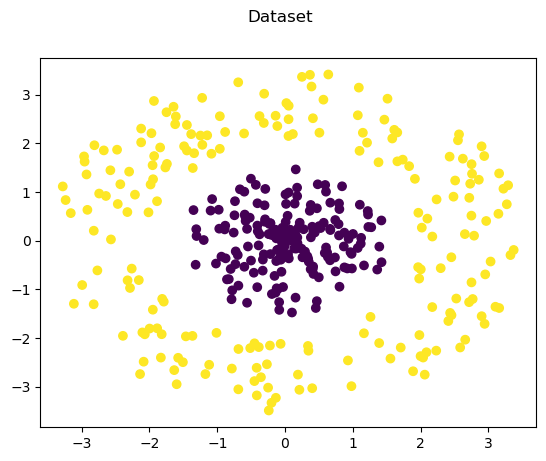

In [4]:
fig,ax = plt.subplots()
ax.scatter(x=X[:,0],y=X[:,1],c=Y[:,0])
fig.suptitle("Dataset")
plt.show()

In [5]:
from typing import Any

class Network(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.d1 = nn.Linear(in_features=2,out_features=5,bias=True)
        self.d2 = nn.Linear(in_features=5,out_features=1,bias=True)

    def __call__(self, x) -> Any:
        o = self.d1(x)
        o = torch.relu(o)
        o = self.d2(o)
        o = torch.sigmoid(o)
        return o

In [6]:
loss = torch.nn.functional.binary_cross_entropy

In [7]:
LR = 10**-3

net = Network()
opt = torch.optim.SGD(params=net.parameters(),lr=LR)

In [8]:
EPOCHS = 10
BS = 32

losses = []
ep_losses = []

N = X.shape[0]
for e in range(EPOCHS):
    for step in range(0,N,N//BS):
        X_B = torch.tensor(X[step:step+BS,:],dtype=torch.float32)
        Y_B = torch.tensor(Y[step:step+BS],dtype=torch.float32)
        O = net(X_B)
        l = loss(O,Y_B)
        l.backward()
        opt.step()
        print(f"step:{step//BS}/{N//BS} \tep:{e}/{EPOCHS} \t loss:{l.item()}")
        losses.append(l.item())
    ep_losses.append(l.item())


step:0/12 	ep:0/10 	 loss:0.7199400067329407
step:0/12 	ep:0/10 	 loss:0.7094253897666931
step:0/12 	ep:0/10 	 loss:0.7219158411026001
step:1/12 	ep:0/10 	 loss:0.79252028465271
step:1/12 	ep:0/10 	 loss:0.7419823408126831
step:1/12 	ep:0/10 	 loss:0.6641794443130493
step:2/12 	ep:0/10 	 loss:0.6165177822113037
step:2/12 	ep:0/10 	 loss:0.6509221196174622
step:3/12 	ep:0/10 	 loss:0.665801465511322
step:3/12 	ep:0/10 	 loss:0.6738402843475342
step:3/12 	ep:0/10 	 loss:0.6414173245429993
step:4/12 	ep:0/10 	 loss:0.6662474274635315
step:4/12 	ep:0/10 	 loss:0.6809303164482117
step:4/12 	ep:0/10 	 loss:0.7282215356826782
step:5/12 	ep:0/10 	 loss:0.7049665451049805
step:5/12 	ep:0/10 	 loss:0.6976271867752075
step:6/12 	ep:0/10 	 loss:0.6994627118110657
step:6/12 	ep:0/10 	 loss:0.6798735857009888
step:6/12 	ep:0/10 	 loss:0.6723455190658569
step:7/12 	ep:0/10 	 loss:0.6478567719459534
step:7/12 	ep:0/10 	 loss:0.632798969745636
step:7/12 	ep:0/10 	 loss:0.684544026851654
step:8/12 	ep:0

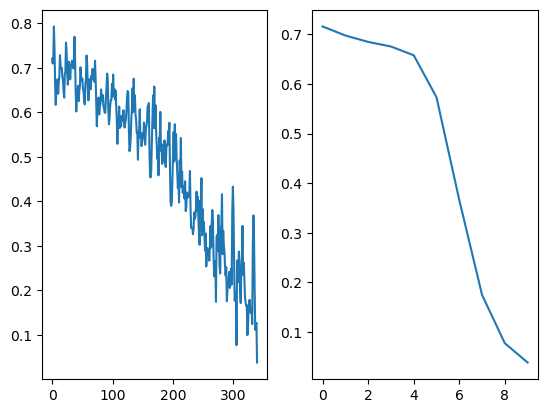

In [9]:
fig,ax = plt.subplots(1,2)
ax[0].plot(losses)
ax[1].plot(ep_losses)
plt.show()

In [10]:
Y_Pred = net(torch.tensor(X,dtype=torch.float32)).detach().numpy()

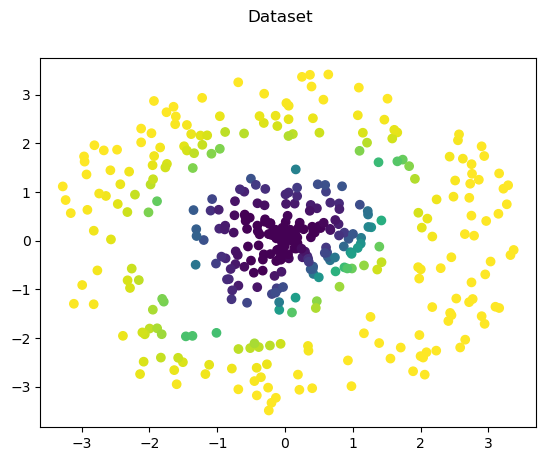

In [11]:
fig,ax = plt.subplots()
ax.scatter(x=X[:,0],y=X[:,1],c=Y_Pred[:,0])
fig.suptitle("Dataset")
plt.show()

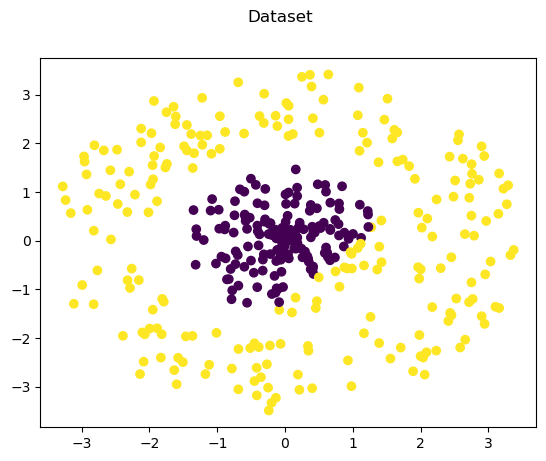

In [12]:
Y_Pred[Y_Pred>=0.5] = np.ones_like(Y_Pred[Y_Pred>=0.5])
Y_Pred[Y_Pred<0.5] = np.zeros_like(Y_Pred[Y_Pred<0.5])
fig,ax = plt.subplots()
ax.scatter(x=X[:,0],y=X[:,1],c=Y_Pred[:,0])
fig.suptitle("Dataset")
plt.show()